# Kaggle
## Digit Recognizer

Author: Vinícius Hiroshi Higa

In [ ]:
!kaggle competitions download -c digit-recognizer

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
row_size = train_df.iloc[0].shape
row_size = int(row_size[0]) - 1 # We need to subtract -1 to remove the label column
img_size = int(math.sqrt(row_size))
print("Image size: " + str(img_size) + "x" + str(img_size))

Image size: 28x28


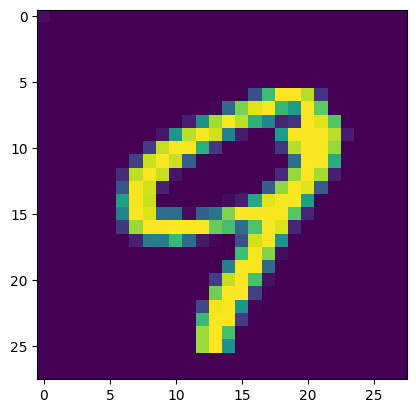

In [4]:
example_row = train_df.iloc[100]
example_row = example_row[0:784]
example_row = np.array(example_row, dtype=np.uint8)
example_img = example_row.reshape((img_size, img_size))

plt.imshow(example_img)

In [5]:
# Get one hot encoding of columns LABEL
one_hot = pd.get_dummies(train_df['label'])
# Drop column B as it is now encoded
train_df = train_df.drop('label',axis = 1)
# Join the encoded df
train_df = train_df.join(one_hot)

train_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [6]:
X = train_df.iloc[: , 0:784]
y = train_df.iloc[: , 784:794]

X = X.values.reshape(-1,28,28,1)

print(X[0].shape)
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print("Training data size: " + str(X_train.shape[0]))

(28, 28, 1)
Training data size: 28140


# Creating the model

In [7]:
# model = tf.keras.Sequential([
#     tf.keras.Input(shape=(img_size * img_size,)),
#     tf.keras.layers.Dense(256, activation='ReLU'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dense(128, activation='ReLU'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dense(10, activation='softmax'),
# ])

model = tf.keras.Sequential([
    tf.keras.Input(shape=(img_size, img_size, 1,)),
    tf.keras.layers.Conv2D(64, (8,8), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (4,4), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(16, (4,4), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=[tf.keras.metrics.CategoricalAccuracy()])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 21, 21, 64)        4160      
                                                                 
 batch_normalization (BatchN  (None, 21, 21, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 18, 32)        32800     
                                                                 
 batch_normalization_1 (Batc  (None, 18, 18, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 16)        8208      
                                                                 
 batch_normalization_2 (Batc  (None, 15, 15, 16)       6

In [8]:
model.fit(x=X_train, y=y_train, batch_size=1000, epochs=100, verbose=2)

Epoch 1/100
29/29 - 11s - loss: 0.3605 - categorical_accuracy: 0.8927 - 11s/epoch - 395ms/step
Epoch 2/100
29/29 - 1s - loss: 0.0627 - categorical_accuracy: 0.9808 - 1s/epoch - 41ms/step
Epoch 3/100
29/29 - 1s - loss: 0.0260 - categorical_accuracy: 0.9918 - 1s/epoch - 41ms/step
Epoch 4/100
29/29 - 1s - loss: 0.0137 - categorical_accuracy: 0.9961 - 1s/epoch - 40ms/step
Epoch 5/100
29/29 - 1s - loss: 0.0088 - categorical_accuracy: 0.9982 - 1s/epoch - 40ms/step
Epoch 6/100
29/29 - 1s - loss: 0.0044 - categorical_accuracy: 0.9995 - 1s/epoch - 40ms/step
Epoch 7/100
29/29 - 1s - loss: 0.0021 - categorical_accuracy: 0.9999 - 1s/epoch - 41ms/step
Epoch 8/100
29/29 - 1s - loss: 0.0014 - categorical_accuracy: 1.0000 - 1s/epoch - 41ms/step
Epoch 9/100
29/29 - 1s - loss: 9.1154e-04 - categorical_accuracy: 1.0000 - 1s/epoch - 41ms/step
Epoch 10/100
29/29 - 1s - loss: 7.3071e-04 - categorical_accuracy: 1.0000 - 1s/epoch - 41ms/step
Epoch 11/100
29/29 - 1s - loss: 8.4697e-04 - categorical_accuracy: 1

Epoch 86/100
29/29 - 1s - loss: 1.3044e-05 - categorical_accuracy: 1.0000 - 1s/epoch - 42ms/step
Epoch 87/100
29/29 - 1s - loss: 1.2625e-05 - categorical_accuracy: 1.0000 - 1s/epoch - 42ms/step
Epoch 88/100
29/29 - 1s - loss: 1.2461e-05 - categorical_accuracy: 1.0000 - 1s/epoch - 42ms/step
Epoch 89/100
29/29 - 1s - loss: 1.2036e-05 - categorical_accuracy: 1.0000 - 1s/epoch - 41ms/step
Epoch 90/100
29/29 - 1s - loss: 1.1737e-05 - categorical_accuracy: 1.0000 - 1s/epoch - 41ms/step
Epoch 91/100
29/29 - 1s - loss: 1.1631e-05 - categorical_accuracy: 1.0000 - 1s/epoch - 41ms/step
Epoch 92/100
29/29 - 1s - loss: 1.1577e-05 - categorical_accuracy: 1.0000 - 1s/epoch - 42ms/step
Epoch 93/100
29/29 - 1s - loss: 1.1948e-05 - categorical_accuracy: 1.0000 - 1s/epoch - 41ms/step
Epoch 94/100
29/29 - 1s - loss: 1.0753e-05 - categorical_accuracy: 1.0000 - 1s/epoch - 41ms/step
Epoch 95/100
29/29 - 1s - loss: 1.0272e-05 - categorical_accuracy: 1.0000 - 1s/epoch - 42ms/step
Epoch 96/100
29/29 - 1s - loss

In [9]:
results = model.evaluate(X_test, y_test, batch_size=128)
results

109/109 [==============================] - 1s 4ms/step - loss: 0.0491 - categorical_accuracy: 0.9905


[0.049103934317827225, 0.990548312664032]

# Test Dataset

In [130]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
results = model.predict(x=test_df)

875/875 [==============================] - 1s 1ms/step


In [132]:
predictions_df = pd.DataFrame(columns=['ImageId','Label'])

In [133]:
index = 1
for prediction in results:
    label = np.argmax(prediction)
    predictions_df = pd.concat([predictions_df, pd.DataFrame.from_records([{'ImageId': index, 'Label': str(label)}])])
    index += 1

In [134]:
predictions_df

,ImageId,Label
0,1,2
0,2,0
0,3,9
0,4,9
0,5,3
...,...,...
0,27996,9
0,27997,7
0,27998,3
0,27999,9


In [135]:
predictions_df.to_csv('results.csv', index=False)